In [1]:
import pandas as pd
df = pd.read_csv('./data.csv')

# ランキング

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

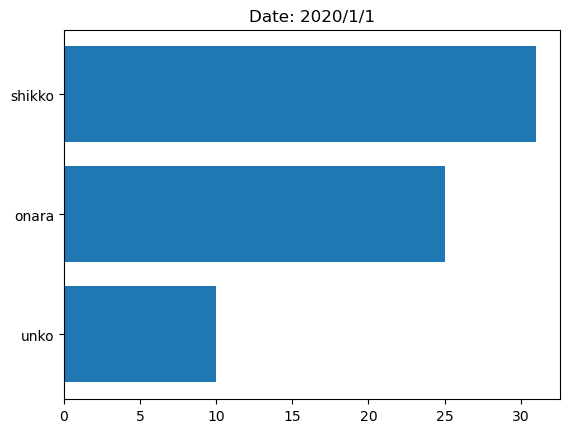

In [3]:
# データの準備
df_sorted = df.pivot(index='date', columns='item', values='value')

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    current_date = df_sorted.index[frame]
    data = df_sorted.loc[current_date].sort_values(ascending=True)
    ax.barh(data.index, data.values)
    ax.set_title(f"Date: {current_date}")

ani = FuncAnimation(fig, update, frames=len(df_sorted), repeat=False)


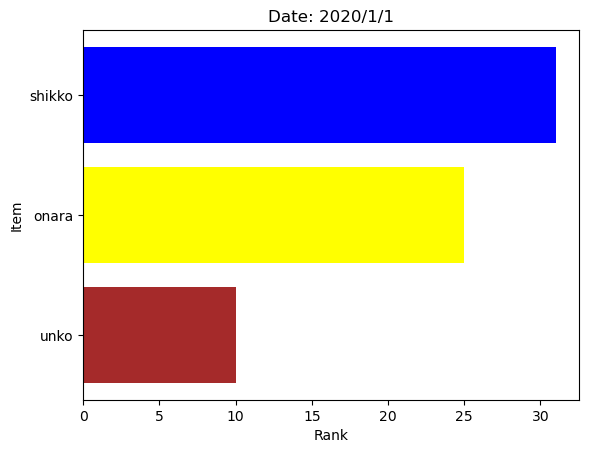

In [4]:
# CSVデータの読み込み
df = pd.read_csv('data.csv')

# データの整形：各アイテムの色を対応させるために、'item'列と'color'列をペアで保持
color_map = dict(zip(df['item'], df['color']))

# dateごとにitemとrankをpivot
df_sorted = df.pivot(index='date', columns='item', values='value')

# アニメーション用のグラフを設定
fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    
    # 現在のフレーム（時点）に対応するデータを取得
    current_date = df_sorted.index[frame]
    data = df_sorted.loc[current_date].sort_values(ascending=True)  # ランク順にソート
    
    # 各アイテムに対応する色を取得
    colors = [color_map[item] for item in data.index]
    
    # ランキングの変動を棒グラフとして表示
    ax.barh(data.index, data.values, color=colors)
    ax.set_title(f"Date: {current_date}")
    ax.set_xlabel('Rank')
    ax.set_ylabel('Item')

# アニメーションを作成
ani = FuncAnimation(fig, update, frames=len(df_sorted), repeat=False)

# GIFとして保存
ani.save('ranking_animation_with_colors.gif', writer='pillow')
